In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the dataset
df = pd.read_excel("C:/Users/savit/OneDrive/Desktop/Copy of Nifty_50.xlsx")  # Replace with actual filename

In [ ]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y", errors='coerce')

In [ ]:
# Drop rows with missing values in Date
df = df.dropna(subset=["Date"])

In [ ]:
# Sort data by Date
df = df.sort_values(by="Date")

In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Date             0
Open             0
High             0
Low              0
Close            0
Shares Traded    0
Turnover         0
dtype: int64


In [ ]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                                 Date
count                            497
mean   2023-02-10 07:43:34.889336064
min              2022-02-10 00:00:00
25%              2022-08-11 00:00:00
50%              2023-02-09 00:00:00
75%              2023-08-10 00:00:00
max              2024-02-09 00:00:00


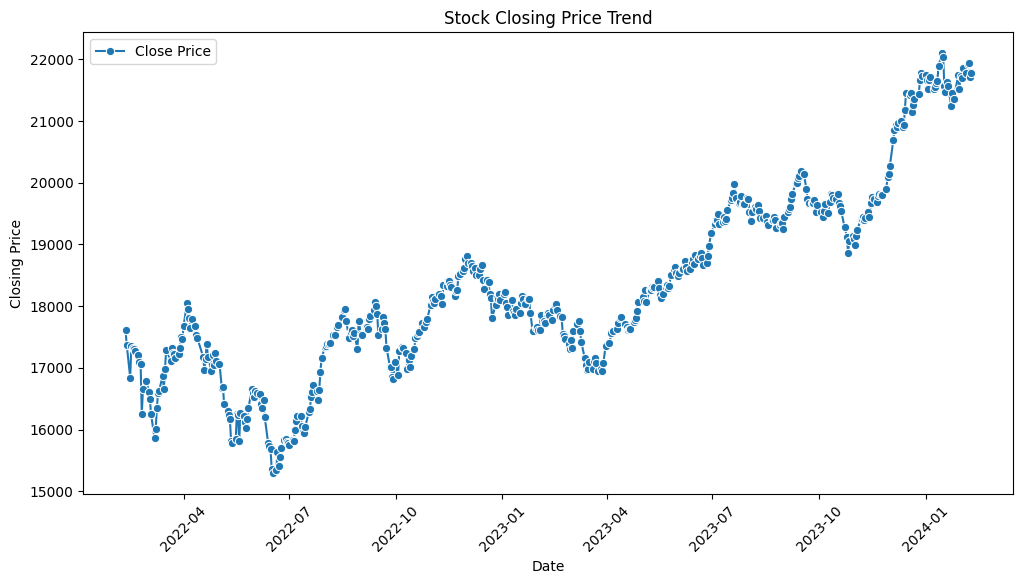

In [ ]:
# Visualizing the data
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df["Close"], marker="o", label="Close Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Price Trend")
plt.legend()
plt.xticks(rotation=45)
plt.show()

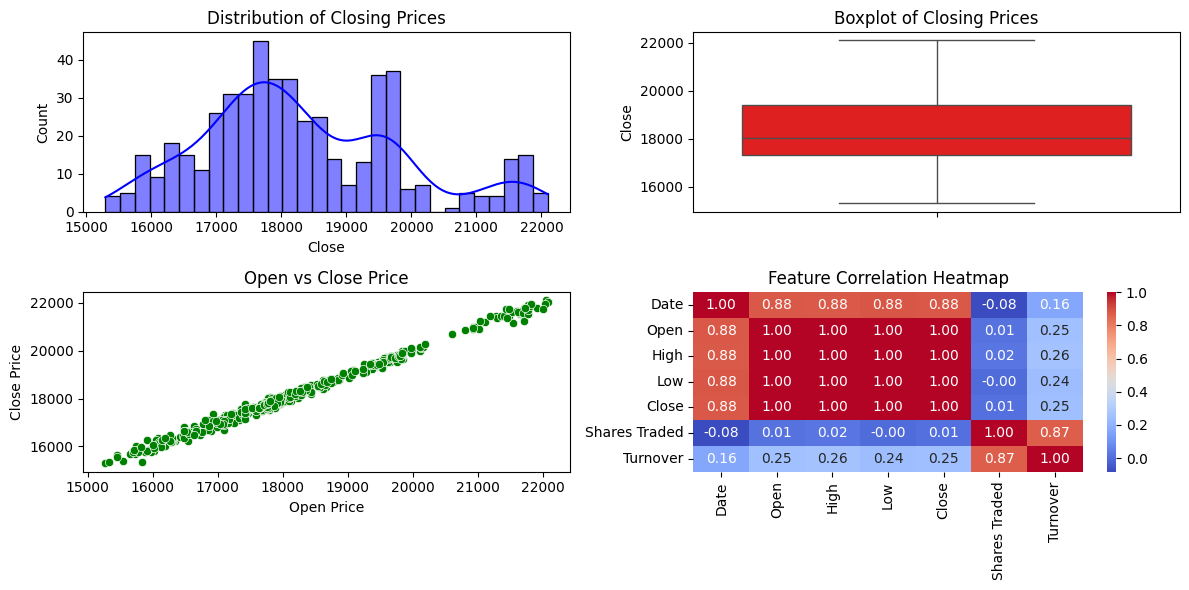

In [ ]:
# Additional visualizations
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df["Close"], bins=30, kde=True, color="blue")
plt.title("Distribution of Closing Prices")
plt.subplot(2, 2, 2)
sns.boxplot(y=df["Close"], color="red")
plt.title("Boxplot of Closing Prices")

plt.subplot(2, 2, 3)
sns.scatterplot(x=df["Open"], y=df["Close"], color="green")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Open vs Close Price")

plt.subplot(2, 2, 4)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")

plt.tight_layout()
plt.show()

In [ ]:

# Selecting features and target variable
X = df.drop(columns=["Date", "Close"])  # Excluding Date and Close columns
y = df["Close"]

In [ ]:

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Model Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Accuracy estimation

In [ ]:
# Print performance metrics
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")


Model Performance:
Mean Absolute Error (MAE): 58.87
Root Mean Squared Error (RMSE): 76.82
R² Score: 1.00
Mean Absolute Percentage Error (MAPE): 0.32%
Model Accuracy: 99.68%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
# Load the dataset
df = pd.read_excel("C:/Users/savit/OneDrive/Desktop/Copy of Nifty_50.xlsx")  # Replace with actual filename

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

In [ ]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y", errors='coerce')

In [ ]:
# Drop rows with missing values in Date
df = df.dropna(subset=["Date"])

In [ ]:
# Sort data by Date
df = df.sort_values(by="Date")


In [ ]:
# Selecting features and target variable
X = df.drop(columns=["Date", "Close"])  # Excluding Date and Close columns
y = df["Close"]

In [ ]:


# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [ ]:
# Model Performance Metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # Mean Absolute Percentage Error
    accuracy = 100 - mape  # Accuracy estimation

    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Model Accuracy: {accuracy:.2f}%")

In [ ]:
# Evaluate both models
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, lr_pred, "Linear Regression")


Random Forest Performance:
Mean Absolute Error (MAE): 58.87
Mean Squared Error (MSE): 5901.36
Root Mean Squared Error (RMSE): 76.82
R² Score: 1.00
Mean Absolute Percentage Error (MAPE): 0.32%
Model Accuracy: 99.68%

Linear Regression Performance:
Mean Absolute Error (MAE): 37.79
Mean Squared Error (MSE): 2996.39
Root Mean Squared Error (RMSE): 54.74
R² Score: 1.00
Mean Absolute Percentage Error (MAPE): 0.21%
Model Accuracy: 99.79%


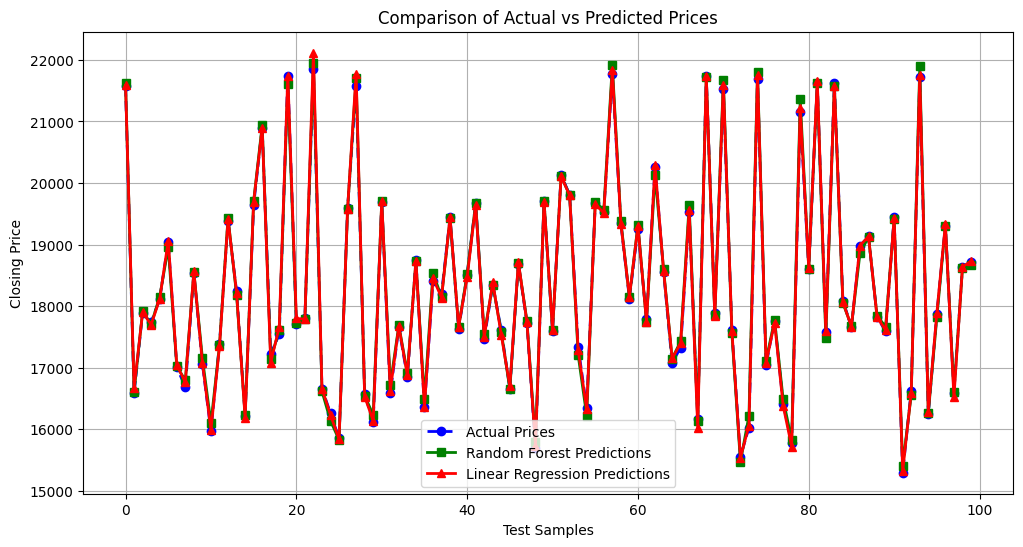

In [ ]:
# Line Plot Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Prices", linestyle='dashed', marker='o', color='blue', linewidth=2)
plt.plot(rf_pred, label="Random Forest Predictions", marker='s', color='green', linewidth=2)
plt.plot(lr_pred, label="Linear Regression Predictions", marker='^', color='red', linewidth=2)
plt.xlabel("Test Samples")
plt.ylabel("Closing Price")
plt.title("Comparison of Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

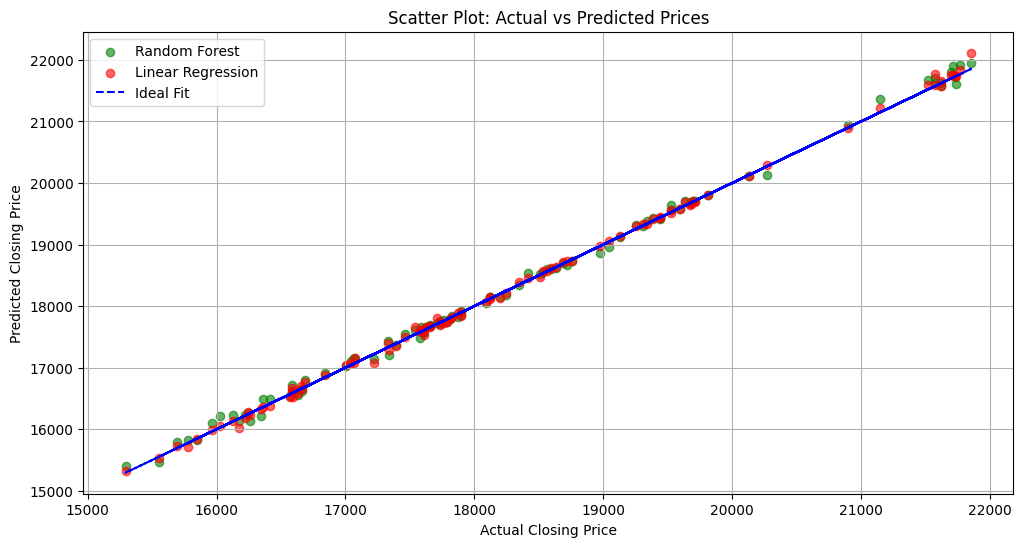

In [ ]:
# Scatter Plot Comparison
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_pred, label="Random Forest", color='green', alpha=0.6)
plt.scatter(y_test, lr_pred, label="Linear Regression", color='red', alpha=0.6)
plt.plot(y_test, y_test, color='blue', linestyle='dashed', label="Ideal Fit")
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Scatter Plot: Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()
